### Fill in your name, student id number and email address
#### name: Aleksi Pikkarainen
#### student id: ******
#### email: akpikk@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the wine dataset, available on moodle as `ex3_wine.csv`. The features are all numeric. They quantify chemical properties of wine, grown around the same area in Italy. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 - **For a passing grade, Parts 1-3 must be complete**, and all questions in each of them should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 - For completing Parts 1-3 and the optional bonus Part 4 sufficiently well, you will be awarded one bonus point for the exam.
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use **"Restart Kernel and Run All Cells"** on your finished notebook to make sure it runs without errors and produces the expected output.
 - Comment your code to explain how it works and what you intend for it to do.
 - Answer the questions asked in the assignments in Markdown cells.
 - If you're having trouble with this exercise, try an online search first, but **don't just copy-paste code you find**. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, **ask for advice at the exercise sessions** or in the course discussion forum on Moodle or email oskari.s.heikkinen@utu.fi.
 - If/when you look things up during this exercise, please **cite your sources**, e.g. a link to a web page. It's better to cite too much than too little.
 - **We don't encourage using a large language model (LLM) such as ChatGPT while doing these exercises.** However, if you do use an LLM, be critical of its output. Understand any code the LLM produced before using the code, don't just copy-paste it. If you used one, write a short description of how you used the LLM in the context of these exercises (what was your input, how did you benefit from the output?)

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [1]:
import itertools # has some utilities that may be useful in the exercise

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage as ln, dendrogram as dgram
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the Moodle page of this course. (`ex3_wine.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
#Let's first take the data path and read it into a dataframe with the correct data types.
data_path = "ex3_wine.csv"
data = pd.read_csv(data_path, dtype = {"alcohol" : "float", "malic_acid" : "float", "ash" : "float", "ash_alc" : "float", "mg" : "int", "phenols" : "float", "flavanoids" : "float", "nonflav_phenols" : "float", "proant" : "float", "color_int" : "float", "hue" : "float", "ODs" : "float", "proline" : "int"})

#Let's check if the data loaded correctly.
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
#Let's also check if the data types were loaded as intended.
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [4]:
#Finally, let's check for missing values.
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

In [5]:
#Let's perform the z-score standardization on our features. Source: https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)

print(scaled_data)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


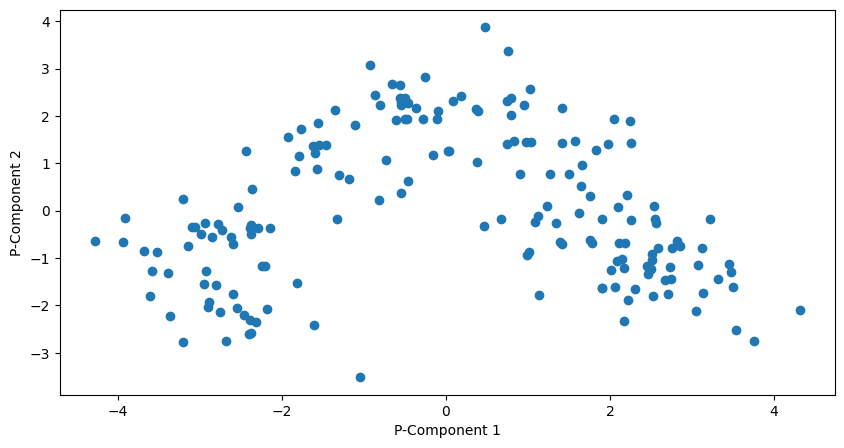

In [6]:
#Let's project the data to two dimensions with PCA. Source: https://www.datacamp.com/tutorial/principal-component-analysis-in-python
w_pca = PCA(n_components = 2)
wine_PCA = w_pca.fit_transform(scaled_data)

#Let's then visualize the data in a scatter plot.
plt.figure(figsize = (10, 5))
plt.scatter(wine_PCA[:,0], wine_PCA[:,1])
plt.xlabel("P-Component 1")
plt.ylabel("P-Component 2")
plt.show()

<p> Just by watching, the clusters are a bit hard to see. Zooming out and squinting your eyes makes it a bit easier to spot some possible clusters. </p>

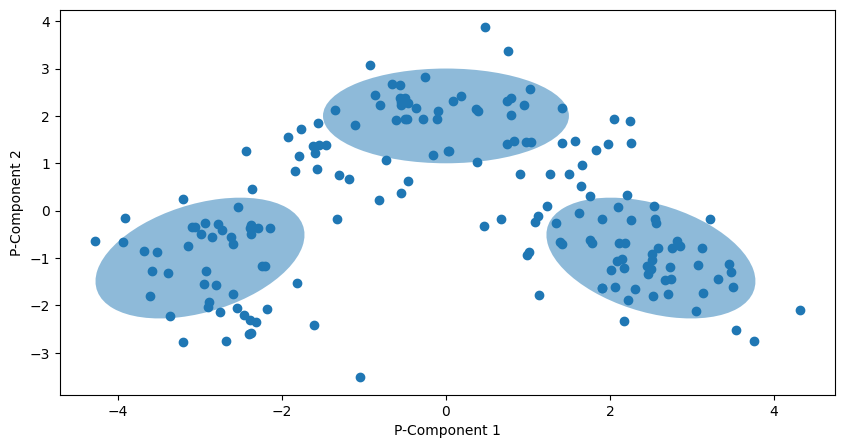

In [7]:
#Let's then draw some ellipses on the clusters.
plt.figure(figsize = (10, 5))
plt.scatter(wine_PCA[:,0], wine_PCA[:,1])
plt.xlabel("P-Component 1")
plt.ylabel("P-Component 2")
ax = plt.gca()
ellipse1 = Ellipse((-3,-1), 3, 2, angle=45, alpha = 0.5)
ellipse2 = Ellipse((0, 2), 3, 2, angle=0, alpha = 0.5)
ellipse3 = Ellipse((2.5,-1), 3, 2, angle=135, alpha = 0.5)
ax.add_artist(ellipse1)
ax.add_artist(ellipse2)
ax.add_artist(ellipse3)
plt.show()

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 2-10 clusters using agglomerative hierarchical clustering.
 - Try different values for the linkage parameter. (Ward, Single, Average and Complete)
 - Use the z-score standardized 13-dimensional data for clustering - **don't use the first two principal components for clustering!**
 - Explain why using the two principal components would be a bad idea for clustering.
 - Using silhouette score, evaluate the clustering performance for each linkage criterion and number of clusters combination. Sort the results by silhouette score.
 - Plot the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.
 - Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.


*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

*Note: it's a common mistake to think that the points in the scatter plot should move when clustering, but they should not. Clustering can be visualized simply by colouring data points on an existing plot.*

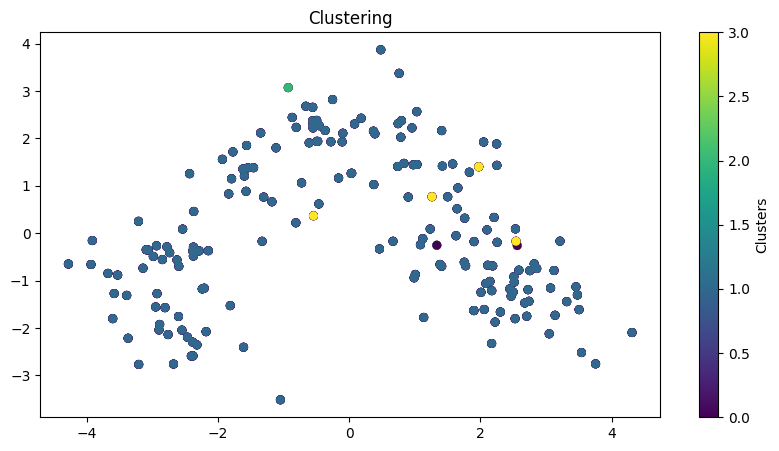

In [8]:


#Let's cluster the data into 2-10 clusters using agglomerative hierarchical clustering and trying different linkage parameter values. Source: https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp
cluster_ranges = range(2,11)

#The different linkage parameter values
linkage = ['ward', 'single', 'average', 'complete']

#Let's make an array to save the combinations in
results = []

#Let's remove the two first principal components from our data. I asked ChatGPT for help in "How do you remove two first principal components from data?"
pca = PCA(n_components=13)
pca.fit(scaled_data)
components = pca.components_
scaled_data_nopca = scaled_data.dot(components[2:].T)

for l in linkage:
    for n in cluster_ranges:
        cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage=l)
        clusters = cluster.fit_predict(scaled_data_nopca)
        silhouette = silhouette_score(scaled_data_nopca, clusters)
        results.append([l, n, silhouette, clusters])

#Sort by silhouette score
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

#Let's take the six best clusterings based on silhouette score now.
best_clusters = sorted_results[0:6]

#Let's plot the data with our six best clusters with unique colours for each of them.
plt.figure(figsize=(10,5))
for b in best_clusters:
    plt.scatter(wine_PCA[:,0], wine_PCA[:,1], c=b[3], s=30)
    
plt.title(f"Clustering")
plt.colorbar(label='Clusters')
plt.show()

<p> The two principal components are sensitive to noise and might not accurately represent the whole dataset, so using them could be a bad idea. The hierarchical clusters we found don't look the same as in part 1 at all. </p>

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. *Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (`scipy.cluster.hierarchy.linkage`).*
 - Compute the linkage matrix using Ward and Single linkage, and plot the dendrograms using `scipy.cluster.hierarchy.dendrogram`.
 - Truncate the dendrogram for better readability. You may choose how exactly you want to do the truncation.
 - How do you interpret the dendrograms? How do they differ?

*Note: when truncating a dendrogram, a number in parentheses refers to the amount of samples in a subtree. A number without parentheses is the index of a single sample*

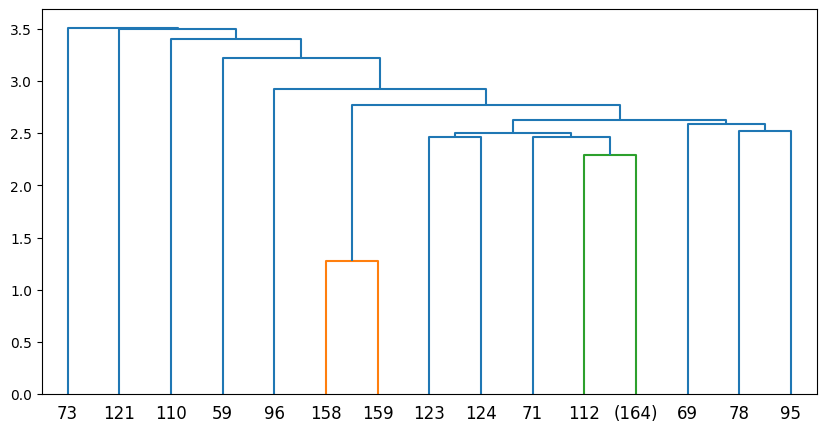

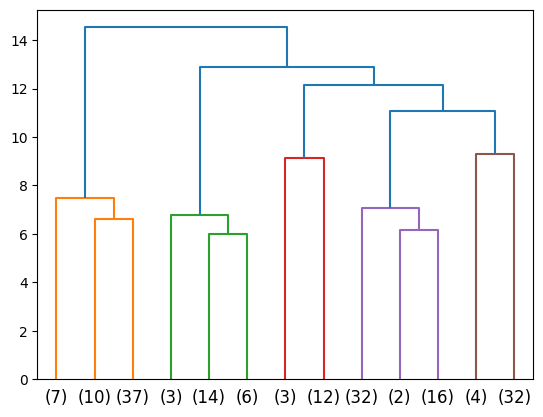

In [9]:
#Let's plot dendograms to visualize the merging process. Source: https://codinginfinite.com/plot-dendrogram-in-python/

#Here's the linkage matrix and the resulting dendogram using single linkage.
plt.figure(figsize=(10,5))
Z = ln(scaled_data_nopca, "single")
dn = dgram(Z, truncate_mode = 'level', p=9)
plt.show()

#Here's the linkage matrix and the resulting dendogram using ward linkage.
Z2 = ln(scaled_data_nopca, "ward")
dn2 = dgram(Z2, truncate_mode = 'lastp', p=13)
plt.show()

<p> The single linkage dendogram suggests that there is a single larger cluster as the green part has tons of samples in a small portion of the dendogram. That cluster has several samples scattered around it implified by the blue lines. The ward linkage dendogram suggests that there are several smaller clusters with no data points around them. The five different colours implify the existence of five smaller clusters. </p> 

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Try 2-10 numbers of clusters.
 - Evaluate the clustering performance using silhouette score.
 - Choose the best 3 numbers of clusters according to silhouette score that you discovered above, and once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

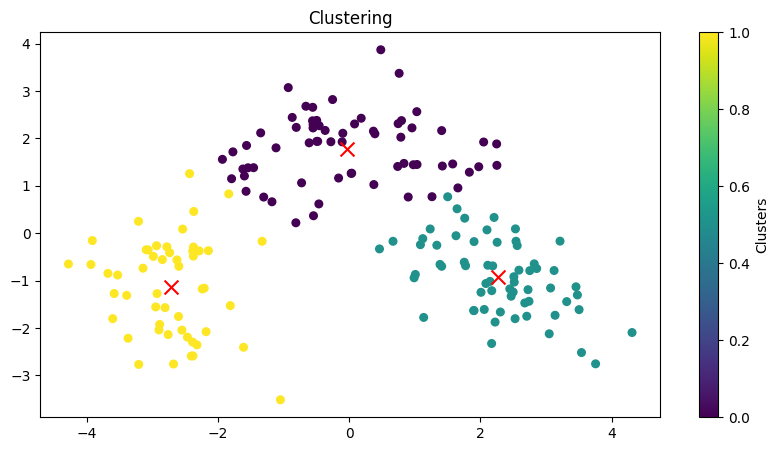

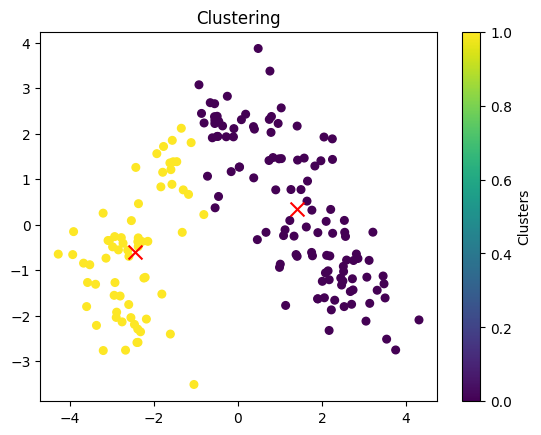

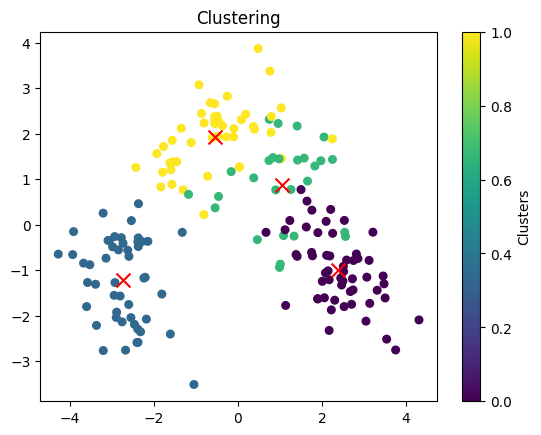

In [10]:
#Let's perform k-means clustering on our data with 2-10 numbers of clusters. Source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
cluster_ranges = range(2,11)

#Let's make an array to save our silhouette socres.
scores = []

for n in cluster_ranges:
    km = KMeans(n_clusters=n)
    kms = km.fit_predict(scaled_data)
    centroid_og = km.cluster_centers_
    centroids_pca = pca.transform(centroid_og)
    score = silhouette_score(scaled_data, km.labels_, metric='euclidean')
    scores.append([score, km, n, kms, centroids_pca])

#Sort by silhouette score
sorted_scores = sorted(scores, key=lambda x: x[0], reverse=True)

#Let's take the three best clusterings based on silhouette score
best_scores = sorted_scores[0:3]

#Let's plot the data with our six best clusters with unique colours for each of them.
plt.figure(figsize=(10,5))
for b in best_scores:
    plt.scatter(wine_PCA[:,0], wine_PCA[:,1], c=b[3], s=30)
    centroid_og = b[1].cluster_centers_
    centroids_pca = pca.transform(centroid_og)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=100, c='red')   
    plt.title(f"Clustering")
    plt.colorbar(label='Clusters')
    plt.show()

The centroids need to be transformed into the PCA space in order for them to be in the same dimension as the data clusters. 

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels are missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the seeds dataset](https://archive.ics.uci.edu/dataset/236/seeds). The features are different properties of wheat seeds. They are divided to three different classes, simply called `target1`, `target2` and `target3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `ex3_seeds_missinglabels.csv`**

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)
| Target | Categorical (nominal)

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

Your task is to use clustering to assign labels to the rows that have an `unknown` value for their label. Do this by first clustering all of the data, and then filling in the unknown values based on which clusters the data points with known values tend to fit in. The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process, though.

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

You are also given the full labels for the dataset in a separate file called `ex3_seeds_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook.